
##**Training and Testing:**

In [ ]:
import os
os.chdir('/content/drive/MyDrive/PCB_Defects_YOLO')

In [ ]:
ls

PCB_Defects_YOLO.ipynb  yolov5/


####**Cloning YOLO Version 5:**

In [ ]:
#-----Cloning YOLO V5-----
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
os.chdir('yolov5')

In [ ]:
ls

benchmarks.py         dataset.yaml  New_Dataset/      runs/           val_batch0_pred.jpg
CITATION.cff          detect.py     PR_curve.png      segment/        val_batch1_pred.jpg
classify/             export.py     __pycache__/      setup.cfg       val_batch2_pred.jpg
confusion_matrix.png  hubconf.py    README.md         train.py        val.py
CONTRIBUTING.md       LICENSE       README.zh-CN.md   tutorial.ipynb  yolov5s.pt
data/                 models/       requirements.txt  utils/


In [ ]:
#-----Installing Required Packages For Yolo-----
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


####**Training YOLO V5 Model:**

--->Image size = 608
<br>--->batch = 16 (Number of images processed in each iteration during training).
<br>--->epochs = 300 (Number of times the entire dataset passed through the model during training).
<br>--->yaml = File contains information of dataset (path to training and validation images, and number of classes).
<br>---> yolov5s.pt = Pre-trained weights for YOLOv5s small model.
<br>--->cache = Speed up the training process by preloading images.
<br>--->pcb_train_1st = Sets name for training run.


In [ ]:
!python /content/drive/MyDrive/PCB_Defects_YOLO/yolov5/train.py --img 608 --batch 16 --epochs 300 --data dataset.yaml --weights yolov5s.pt --cache --name pcb_train_1st

2023-12-17 07:36:29.247574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 07:36:29.247628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 07:36:29.248933: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=ru

In [ ]:
#-----Saving Model in onnx Format-----
!python /content/drive/MyDrive/PCB_Defects_YOLO/yolov5/export.py --weights /content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/weights/best.pt with output shape (1, 25200, 11) (13.8 MB)

TorchScript: starting export with torch 2.1.0+cu121...
TorchScript: export success ✅ 4.1s, saved as /content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/weights/best.torchscript (27.5 MB)
requirements: Ultralytics requireme

###**Confusion Matrix:**

A confusion matrix is a performance measurement tool commonly used in classification tasks to access the accuracy of a predictive model. The matrix provides a summary of the model's performance by comparing actual and predicted class labels.

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
cnf_matrix_path = "/content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/confusion_matrix.png"

# Read the confusion matrix image
cnf_matrix = cv2.imread(cnf_matrix_path)

# Display the confusion matrix image
cv2_imshow(cnf_matrix)
cv2.waitKey(0)
cv2.destroyAllWindows()


###**Precision Recall Curve:**

**Precision:**
<br>It is the ratio of correctly predicted positive observations to the total predicted positives.
<br>P = TP / (TP + FP)
<br>High precision indicates that when the model predicts a positive class it is likely to be positive.
<br>**Recall:**
<br>It is the ratio of correctly predicted positive observations to all observations in actual class.
<br> R = TP / (TP + FN)
<br>High recall indicates that the model is good at capturing all instances of positive class.
<br>**AUC-PR:**
<br>AUC-PR provides a single scalar value that summarizes a the performance of a classification model, focusing on its ability to make high predictions while maintaining high precision.
<br>**mAP:**
It considers average precision across multiple object classes.

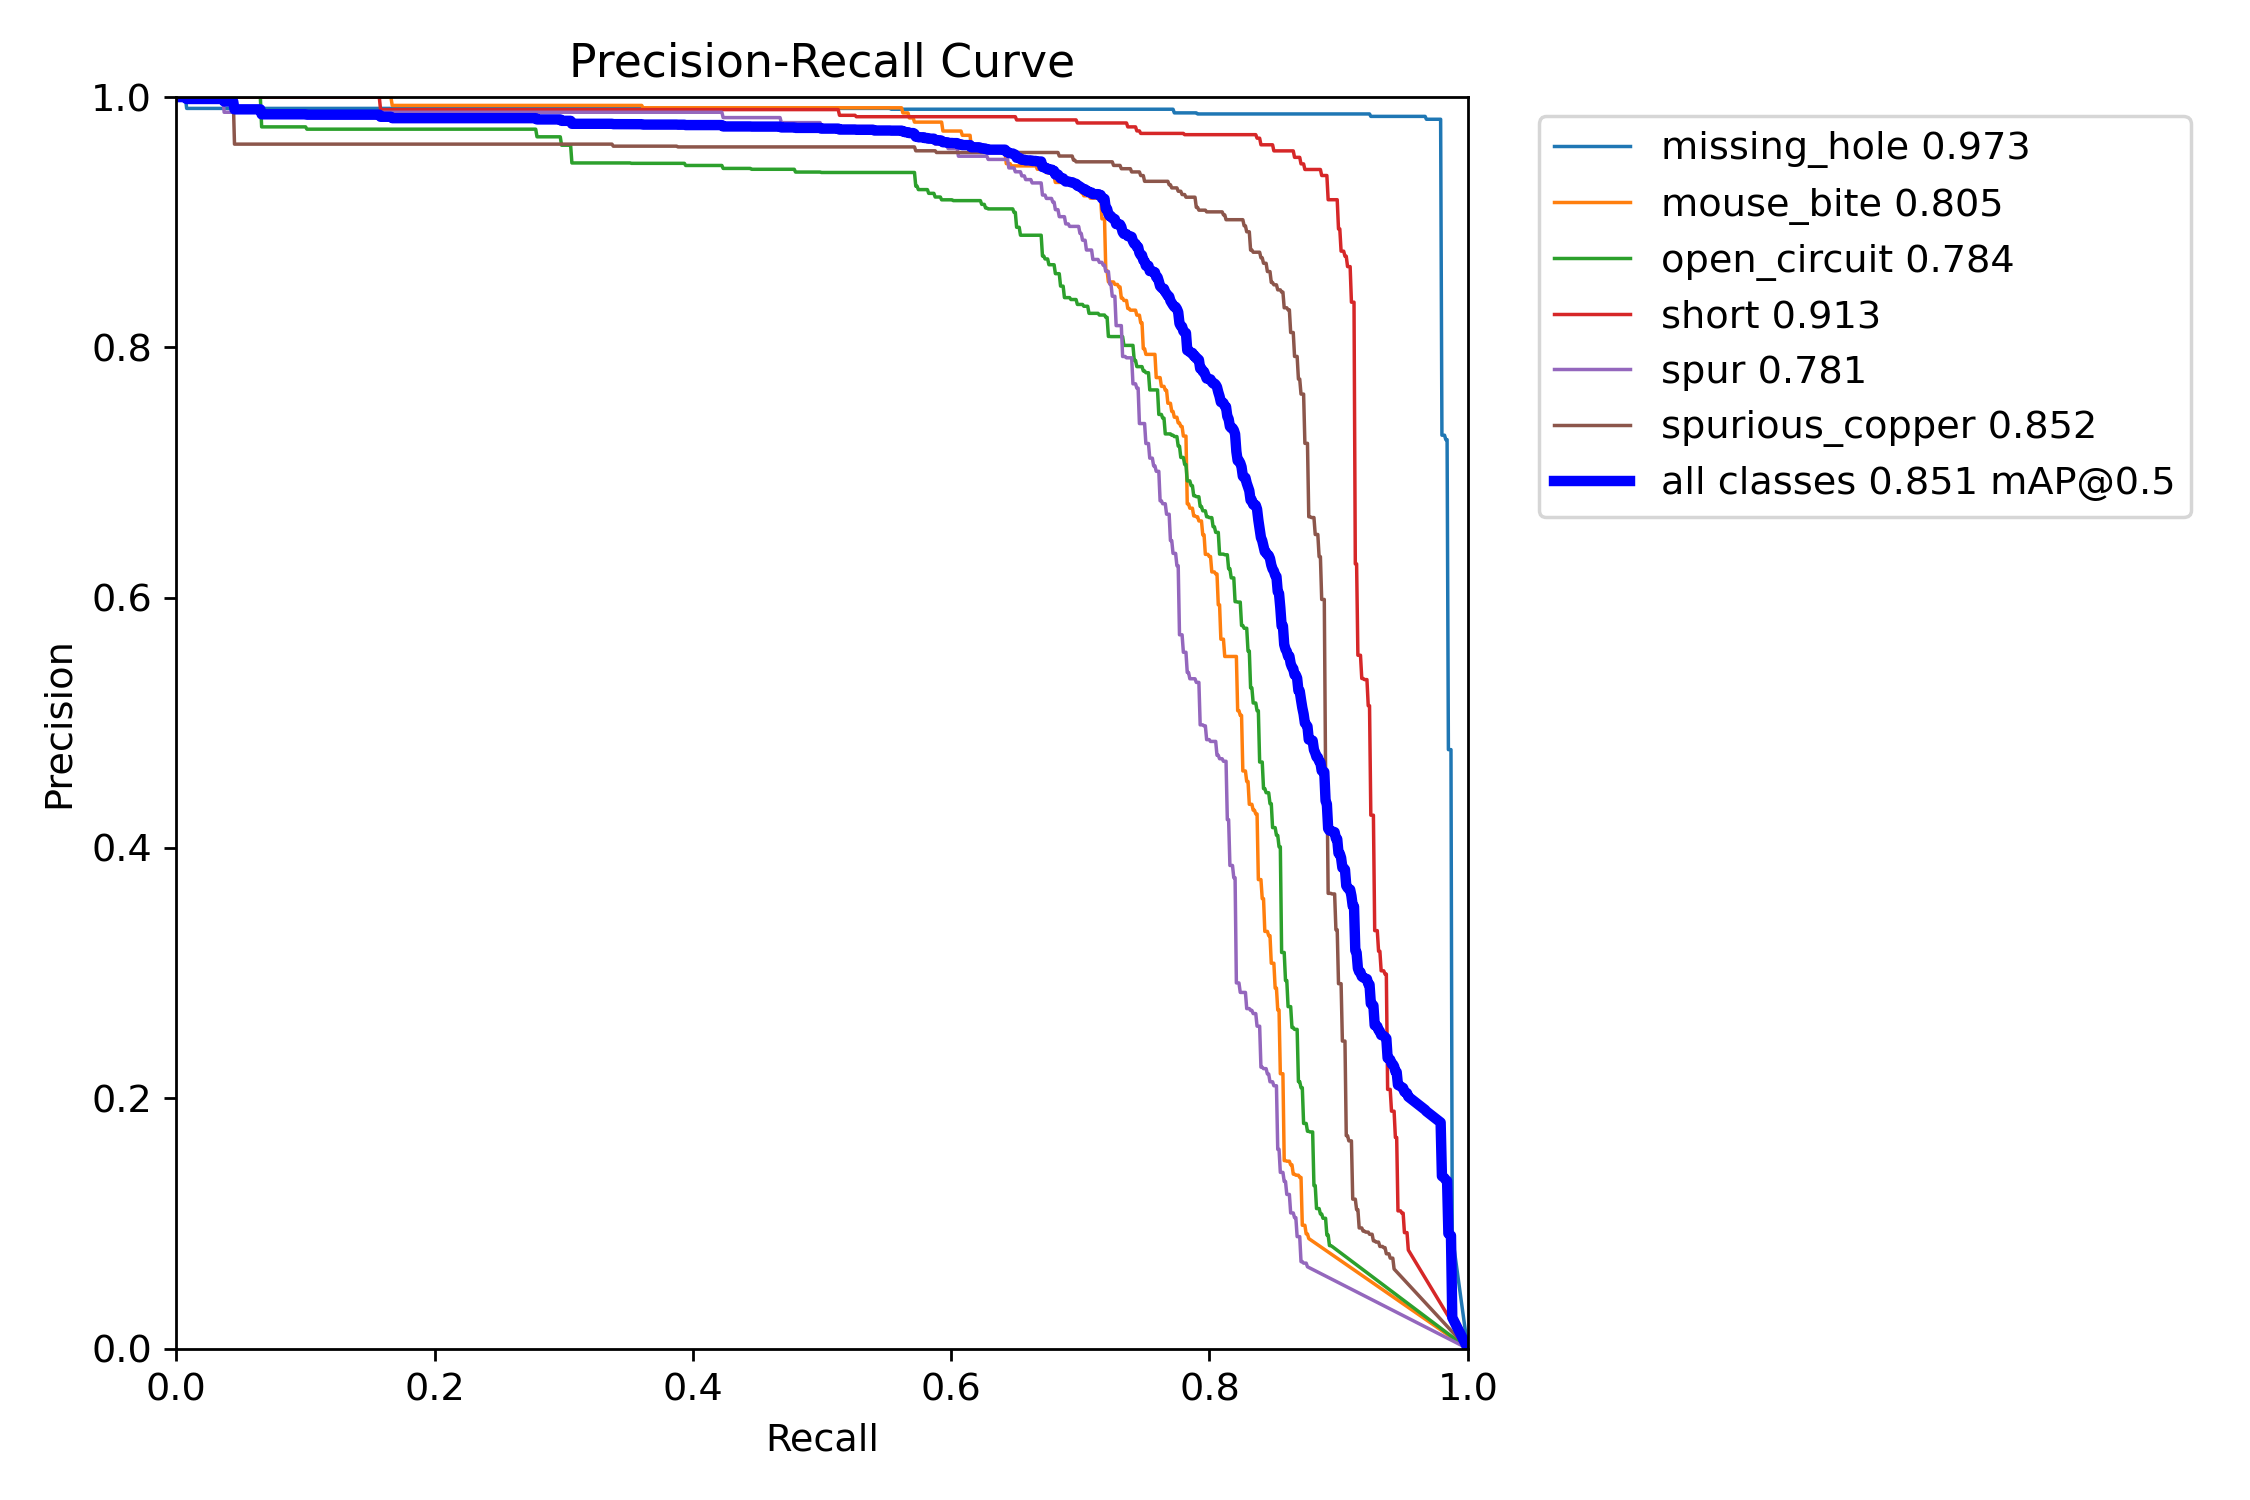

In [ ]:
PR_Curve_path = "/content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/PR_curve.png"
PR_Curve = cv2.imread(PR_Curve_path)
cv2_imshow(PR_Curve)
cv2.waitKey(0)
cv2.destroyAllWindows()

###**Validation Result 0:**

In [ ]:
val0_path = "/content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/val_batch0_pred.jpg"
val0 = cv2.imread(val0_path)
cv2_imshow(val0)
cv2.waitKey(0)
cv2.destroyAllWindows()

###**Validation Result 1:**

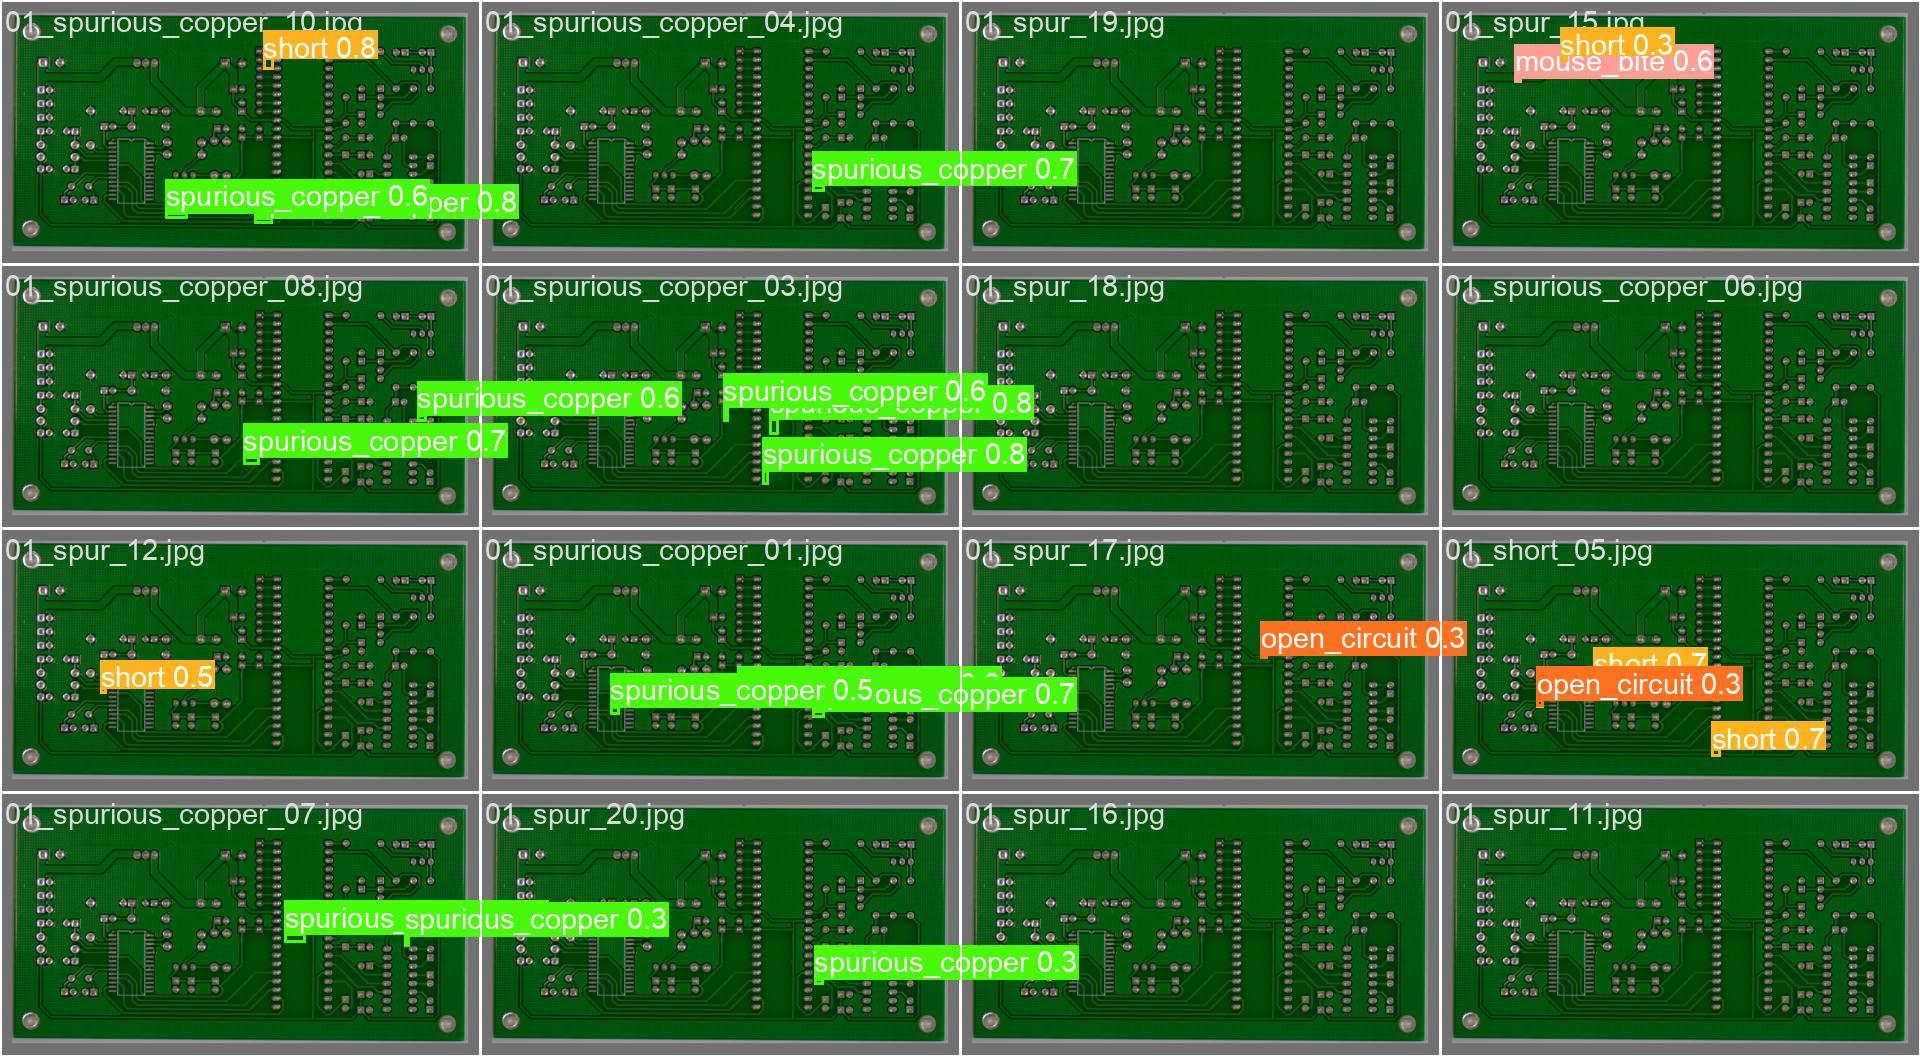

In [ ]:
val1_path = "/content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/val_batch1_pred.jpg"
val1 = cv2.imread(val1_path)
cv2_imshow(val1)
cv2.waitKey(0)
cv2.destroyAllWindows()

###**Validation Result 2:**

In [ ]:
val2_path = "/content/drive/MyDrive/PCB_Defects_YOLO/yolov5/runs/train/pcb_train_1st2/val_batch2_pred.jpg"
val2 = cv2.imread(val2_path)
cv2_imshow(val2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.